In [1]:
from copy import deepcopy
import numpy as np

# Merge Sort

In [2]:
def sort(arr, sort_type='merge sort'):
    if sort_type == 'merge sort':
        merge_sort(arr, 0, len(arr) - 1)
    return

In [3]:
def merge_sort(numbers, left, right):
    if (left < right):
        middle = (left + right) // 2

        merge_sort(numbers, left, middle)
        merge_sort(numbers, middle + 1, right)
        merge(numbers, left, middle, right)

def merge(numbers, left, middle, right):
    # define index iterators: 
    # left arr: [i,...,middle], right arr: [j,...,right]
    # working arr: [0,...,k,...,N-1]
    i = left
    j = middle + 1
    k = left

    # copy of the working array
    temp = numbers
    numbers = np.empty(len(temp))
    
    # iterate until one of the sides runs out of items
    while (i <= middle and j <= right):
        

        if (temp[i] <= temp[j]):
            numbers[k] = temp[i]
            
            i += 1
        else:
            numbers[k] = temp[j]
            
            j += 1

        k += 1
    
    #append remaining from left side
    while (i <= middle):

        numbers[k] = temp[i]
        
        k += 1
        i += 1

    #append remaining from right side
    while (j <= right):

        numbers[k] = temp[j]
        
        
        k += 1
        j += 1

# Quick Sort

In [25]:
def lomuto_partition(arr, left, right, pivot_idx):
    pivot = arr[pivot_idx]
    arr[right], arr[pivot_idx] = arr[pivot_idx], arr[right]

    i = left
    for j in range(left, right):
        if arr[j] < pivot:
            arr[i], arr[j] = arr[j], arr[i] 
            i += 1
            
    arr[right], arr[i] = arr[i], arr[right]
    return i

def select(arr, left, right, k):
    if left == right - 1:
        return arr[left]
    
    pivot_idx = left + (right - left + 1) // 2
    pivot_idx = lomuto_partition(arr, left, right, pivot_idx)
    if k == pivot_idx:
        return arr[k]
    elif k < pivot_idx:
        return select(arr, left, pivot_idx - 1, k)
    else:
        return select(arr, pivot_idx + 1, right, k)
    
def quick_select(arr, k):
    assert 0 < k < len(arr), 'K out of bounds'
    return select(arr, 0, len(arr)-1, k-1)

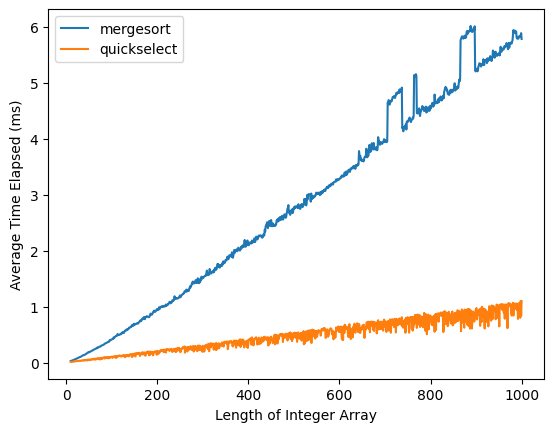

In [33]:
from timeit import timeit
from time import perf_counter_ns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

max_size = 1000
arraysizes = np.linspace(10,max_size,1000, dtype='int32')
n_repeats = 500
time_list = list()
for i, arraysize in enumerate(arraysizes):
#     print('Progress:', i/(len(arraysizes)*3))
    avg_list = list()
    for j in range(n_repeats):
        arr = np.random.randint(0, max_size, size=arraysize)
        start = perf_counter_ns()
        sort(arr, sort_type='merge sort')
        end = perf_counter_ns()
#         print((end - start) / 1e9)
        avg_list.append((end - start)/1e9)
    time_list.append(np.mean(avg_list))

time_arr = np.array(time_list) * 1e3
sns.lineplot(x=arraysizes, y=time_arr, label='mergesort')

time_list.clear()
for i, arraysize in enumerate(arraysizes):
#     print('Progress:', i/(len(arraysizes)*3))
    avg_list = list()
    k = np.random.randint(1,arraysize-1)
    for j in range(n_repeats):
        arr = np.random.randint(0, max_size, size=arraysize)
        start = perf_counter_ns()
        quick_select(arr, k)
        end = perf_counter_ns()
#         print((end - start) / 1e9)
        avg_list.append((end - start)/1e9)
    time_list.append(np.mean(avg_list))

time_arr = np.array(time_list) * 1e3
sns.lineplot(x=arraysizes, y=time_arr, label='quickselect')
plt.ylabel('Average Time Elapsed (ms)')
plt.xlabel('Length of Integer Array')
plt.legend()
plt.savefig('merge_quick_comp_m.png', dpi=300)
plt.show()

# Quick Select

In [ ]:
# #main
# k = int(input("Enter size k: \n"))
# n = int(input("Enter size of list: \n"))
# l = input("Enter numbers separated by spaces: \n")   # takes the whole line of n numbers
# arr = list(map(int,l.split(' ')))

# #find and print
# kthIndex = kthLargestNum(0, n - 1, k, arr)
# print("The top", k, "numbers are:", end=' ')
# for i in range(0, kthIndex + 1):
#     print(arr[i], end=' ')